<a href="https://colab.research.google.com/github/Alex-So-Ma/Fisica_Computacional_2023-1/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 5
####Física Computacional
####Alejandro Soto Malpica

##1. Función RK4

Función que usa el método Runge-Kutta de cuarto orden para resolver ecuaciones diferenciales.

In [ ]:
def RK4(f1,x0,y0,h,m):
  """
  Función que usa el método Runge-Kutta de cuarto orden para resolver la ecuación
  y'=f1(x,y) con condiciones iniciales (x0,y0) arrojando m valores espaciados por h
  """
  import numpy as np

  #Definimos un array donde se guardaran los valores de y(x)
  tamaño=m+1
  aprox=np.zeros(shape=(tamaño,2),dtype=float)
  aprox[0]=[x0,y0]
  xi=x0
  yi=y0

  #Se calculan los valores de yi a través del método Runge-Kutta de cuerto orden
  for i in range(1,tamaño,1):
    k1=f1( xi     , yi      )
    k2=f1( xi+h/2 , yi+h*k1/2 )
    k3=f1( xi+h/2 , yi+h*k2/2 )
    k4=f1( xi+h   , yi+h*k3   )
    yi=yi+(k1+2*k2+2*k3+k4)*(h/6)
    xi=xi+h
    aprox[i]=[xi,yi]

  return aprox

##2. Gráficas

Gráficas de las soluciones aproxiamda (RK4) y analítica de la ecuación:

$$y'-y-x+x^2-1=0$$

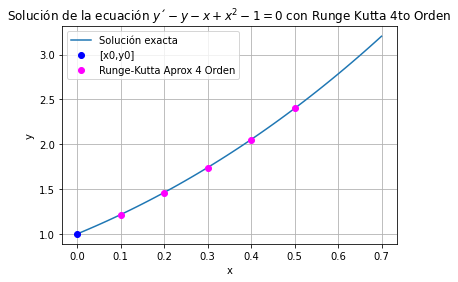

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos la función f1(x,y)
f1=lambda x,y:y-x**2+x+1
x0=0
y0=1
h=0.1
muestras=5

#Resolvemos con RK4 la ecuación
aprox=RK4(f1,x0,y0,h,muestras)

#Creamos los array a graficar
xi=aprox[:,0]
yi=aprox[:,1]

#Definios una función con la solución analítica
sol_real=lambda x:((np.e)**x)+x+x**2
a=x0
b=h*muestras+2*h
muestreo=10*muestras+2

#Creamos los array a graficar
xis=np.linspace(a,b,muestreo)
yis=sol_real(xis)

#Graficamos
plt.plot(xis,yis,label='Solución exacta')
plt.plot(xi[0],yi[0],'o',color='b',label='[x0,y0]')
plt.plot(xi[1:],yi[1:],'o',color='magenta',label='Runge-Kutta Aprox 4 Orden')
plt.title('Solución de la ecuación $y´-y-x+x^2-1=0$ con Runge Kutta 4to Orden')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

##3. Errores

Comparamos los errores de la aproximación de la ecuación de la parte 2 con los errores de los polinomios de Taylor de la solución de esta misma ecuación.

In [ ]:
#Creamos un array con los valores de la solución analítica evaluada en xi
sol_real_yi=sol_real(xi)

#Calculamos los errores
error=sol_real_yi-yi
err_max=np.max(np.abs(error))

print('Error maximo RK4: ',err_max)
print('Errores localizados RK4')
print(error)

#Remplazaos los vaores de yi por lo valores del polinomio de Taylor evaluado en xi
f2=lambda x:1+2*x+(3/2)*x**2
for i in range(5):
  yi[i]=f2(xi[i])

#Calculamos los errores
error=sol_real_yi-yi
err_max=np.max(np.abs(error))

print('Error maximo Taylor 2 términos: ',err_max)
print('Errores localizados Taylor 2 términos')
print(error)

#Remplazaos los vaores de yi por lo valores del polinomio de Taylor evaluado en xi
f3=lambda x:1+2*x+(3/2)*x**2+(x**3)/6
for i in range(5):
  yi[i]=f3(xi[i])

#Calculamos los errores
error=sol_real_yi-yi
err_max=np.max(np.abs(error))

print('Error maximo Taylor 3 términos: ',err_max)
print('Errores localizados Taylor 3 términos')
print(error)

Error maximo RK4:  1.917156652542218e-06
Errores localizados RK4
[0.00000000e+00 2.93075648e-07 6.25886732e-07 1.00354959e-06
 1.43181723e-06 1.91715665e-06]
Error maximo Taylor 2 términos:  0.011824697641270365
Errores localizados Taylor 2 términos
[0.00000000e+00 1.70918076e-04 1.40275816e-03 4.85880758e-03
 1.18246976e-02 1.91715665e-06]
Error maximo Taylor 3 términos:  0.001158030974603541
Errores localizados Taylor 3 términos
[0.00000000e+00 4.25140898e-06 6.94248268e-05 3.58807576e-04
 1.15803097e-03 1.91715665e-06]
